Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load dataset

In [10]:
exp_data=pd.read_csv('../data/dvg_climate_chamber_exp_final_data.csv')

Data Exploration

In [11]:
exp_data.head()

,user_id,lastdata,therm_sens,therm_comfort,therm_pref,therm_accep,met,air_quality,air_velocity,humidity,...,avg_hum17,avg_globe_temp,avg_testo_hum,avg_testo_temp1,avg_testo_temp2,avg_co2,avg_velocity,avg_temp_out,avg_hum_out,clo
0,FA872888,2023-11-29 11:10:42.000,4.0,5,1,1,1.2,3,3,4,...,41.5,18.29,39.77,18.63,18.67,732.9,0.038,1.336667,94.704930,1.35
1,MD189828,2023-11-29 11:18:22.000,3.0,3,3,1,1.0,4,4,4,...,41.0,18.60,38.19,18.93,19.07,765.7,0.038,1.390000,94.639374,0.88
2,FA872888,2023-11-29 11:19:55.000,5.0,4,1,1,1.2,3,3,4,...,40.5,18.63,38.02,18.96,19.10,763.3,0.039,1.396667,94.631180,1.35
3,MD189828,2023-11-29 11:21:42.000,3.0,4,3,1,1.0,5,4,4,...,40.5,18.65,37.74,18.97,19.13,756.8,0.044,1.410000,94.614791,0.88
4,MB654888,2023-11-29 11:23:54.000,3.0,4,3,1,1.0,5,5,4,...,35.0,19.35,32.49,18.60,19.34,641.1,0.035,1.423333,94.598402,0.89


In [12]:
exp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1502 entries, 0 to 1501
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   user_id            1502 non-null   object 
 1   lastdata           1502 non-null   object 
 2   therm_sens         1502 non-null   float64
 3   therm_comfort      1502 non-null   int64  
 4   therm_pref         1502 non-null   int64  
 5   therm_accep        1502 non-null   int64  
 6   met                1502 non-null   float64
 7   air_quality        1502 non-null   int64  
 8   air_velocity       1502 non-null   int64  
 9   humidity           1502 non-null   int64  
 10  overall_comfort    1449 non-null   float64
 11  tiredness          1502 non-null   int64  
 12  age                1502 non-null   int64  
 13  birth_year         1502 non-null   int64  
 14  gender             1502 non-null   int64  
 15  weight             1502 non-null   int64  
 16  sleeping_hours     1502 

In [13]:
exp_data.shape

(1502, 41)

In [14]:
exp_data.describe()

,therm_sens,therm_comfort,therm_pref,therm_accep,met,air_quality,air_velocity,humidity,overall_comfort,tiredness,...,avg_hum17,avg_globe_temp,avg_testo_hum,avg_testo_temp1,avg_testo_temp2,avg_co2,avg_velocity,avg_temp_out,avg_hum_out,clo
count,1502.000000,1502.000000,1502.000000,1502.000000,1502.00000,1502.000000,1502.000000,1502.000000,1449.000000,1502.000000,...,1377.000000,1502.000000,1502.000000,1502.000000,1316.000000,1502.000000,1316.000000,1502.000000,1502.000000,1502.000000
mean,4.120506,3.976698,2.061252,1.139814,1.05273,3.752330,3.966711,3.678429,3.995169,3.452730,...,38.275236,23.273644,36.196402,23.100670,23.103830,676.964133,0.060668,4.611029,83.696705,0.861565
std,1.179773,1.185686,0.779640,0.346909,0.16427,1.022683,1.136968,0.807065,1.170236,0.614148,...,7.209289,3.525380,6.801567,3.641518,3.397525,75.015118,0.034136,4.006318,8.870293,0.283155
min,1.000000,1.000000,1.000000,1.000000,0.80000,1.000000,1.000000,1.000000,1.000000,1.000000,...,25.000000,16.620000,23.060000,16.660000,16.970000,420.800000,0.000000,-2.495000,66.803553,0.290000
25%,3.000000,3.000000,1.000000,1.000000,1.00000,3.000000,3.000000,3.000000,3.000000,3.000000,...,33.000000,20.272500,31.120000,19.962500,20.250000,632.700000,0.040000,2.017208,75.848491,0.680000
50%,4.000000,4.000000,2.000000,1.000000,1.00000,4.000000,4.000000,4.000000,4.000000,4.000000,...,38.000000,23.400000,36.010000,22.810000,22.635000,674.000000,0.056000,4.034792,83.988680,0.880000
75%,5.000000,5.000000,3.000000,1.000000,1.00000,4.000000,5.000000,4.000000,5.000000,4.000000,...,43.000000,26.270000,40.497500,26.260000,25.940000,715.000000,0.075000,8.702846,91.238453,1.010000
max,7.000000,6.000000,3.000000,2.000000,2.00000,7.000000,7.000000,7.000000,6.000000,4.000000,...,63.500000,31.830000,61.070000,31.140000,31.420000,975.400000,0.257000,10.637920,99.284170,1.350000


In [15]:
exp_data.columns

Index(['user_id', 'lastdata', 'therm_sens', 'therm_comfort', 'therm_pref',
       'therm_accep', 'met', 'air_quality', 'air_velocity', 'humidity',
       'overall_comfort', 'tiredness', 'age', 'birth_year', 'gender', 'weight',
       'sleeping_hours', 'height', 'health_status', 'residential_years',
       'room_id', 'avg_wrist_st', 'avg_ankle_st', 'avg_heartrate',
       'avg_temp01', 'avg_temp06', 'avg_temp11', 'avg_temp17', 'avg_hum01',
       'avg_hum06', 'avg_hum11', 'avg_hum17', 'avg_globe_temp',
       'avg_testo_hum', 'avg_testo_temp1', 'avg_testo_temp2', 'avg_co2',
       'avg_velocity', 'avg_temp_out', 'avg_hum_out', 'clo'],
      dtype='object')

In [16]:
exp_data.dtypes

user_id               object
lastdata              object
therm_sens           float64
therm_comfort          int64
therm_pref             int64
therm_accep            int64
met                  float64
air_quality            int64
air_velocity           int64
humidity               int64
overall_comfort      float64
tiredness              int64
age                    int64
birth_year             int64
gender                 int64
weight                 int64
sleeping_hours       float64
height                 int64
health_status          int64
residential_years      int64
room_id                int64
avg_wrist_st         float64
avg_ankle_st         float64
avg_heartrate        float64
avg_temp01           float64
avg_temp06           float64
avg_temp11           float64
avg_temp17           float64
avg_hum01            float64
avg_hum06            float64
avg_hum11            float64
avg_hum17            float64
avg_globe_temp       float64
avg_testo_hum        float64
avg_testo_temp

In [17]:
exp_data.isna().sum()

user_id                0
lastdata               0
therm_sens             0
therm_comfort          0
therm_pref             0
therm_accep            0
met                    0
air_quality            0
air_velocity           0
humidity               0
overall_comfort       53
tiredness              0
age                    0
birth_year             0
gender                 0
weight                 0
sleeping_hours         0
height                 0
health_status          0
residential_years      0
room_id                0
avg_wrist_st           1
avg_ankle_st           1
avg_heartrate          1
avg_temp01           124
avg_temp06           119
avg_temp11           117
avg_temp17           125
avg_hum01            124
avg_hum06            119
avg_hum11            117
avg_hum17            125
avg_globe_temp         0
avg_testo_hum          0
avg_testo_temp1        0
avg_testo_temp2      186
avg_co2                0
avg_velocity         186
avg_temp_out           0
avg_hum_out            0


In [18]:
exp_data.duplicated().sum()

np.int64(0)

In [19]:
exp_data.nunique()

user_id                22
lastdata             1491
therm_sens              7
therm_comfort           6
therm_pref              3
therm_accep             2
met                     6
air_quality             7
air_velocity            7
humidity                7
overall_comfort         6
tiredness               4
age                    15
birth_year             16
gender                  2
weight                 23
sleeping_hours          7
height                 20
health_status           2
residential_years       4
room_id                 2
avg_wrist_st          726
avg_ankle_st          588
avg_heartrate        1472
avg_temp01            342
avg_temp06            321
avg_temp11            336
avg_temp17            330
avg_hum01              65
avg_hum06              70
avg_hum11              72
avg_hum17              71
avg_globe_temp        749
avg_testo_hum         932
avg_testo_temp1       770
avg_testo_temp2       674
avg_co2               915
avg_velocity          173
avg_temp_out

In [20]:
exp_data['gender'].value_counts()

gender
2    861
1    641
Name: count, dtype: int64

In [21]:
exp_data['therm_pref'].value_counts()

therm_pref
2    584
3    505
1    413
Name: count, dtype: int64

In [22]:
exp_data['therm_sens'].value_counts()

therm_sens
4.0    541
3.0    342
5.0    319
6.0    173
2.0     77
7.0     27
1.0     23
Name: count, dtype: int64

Variable distribution plot

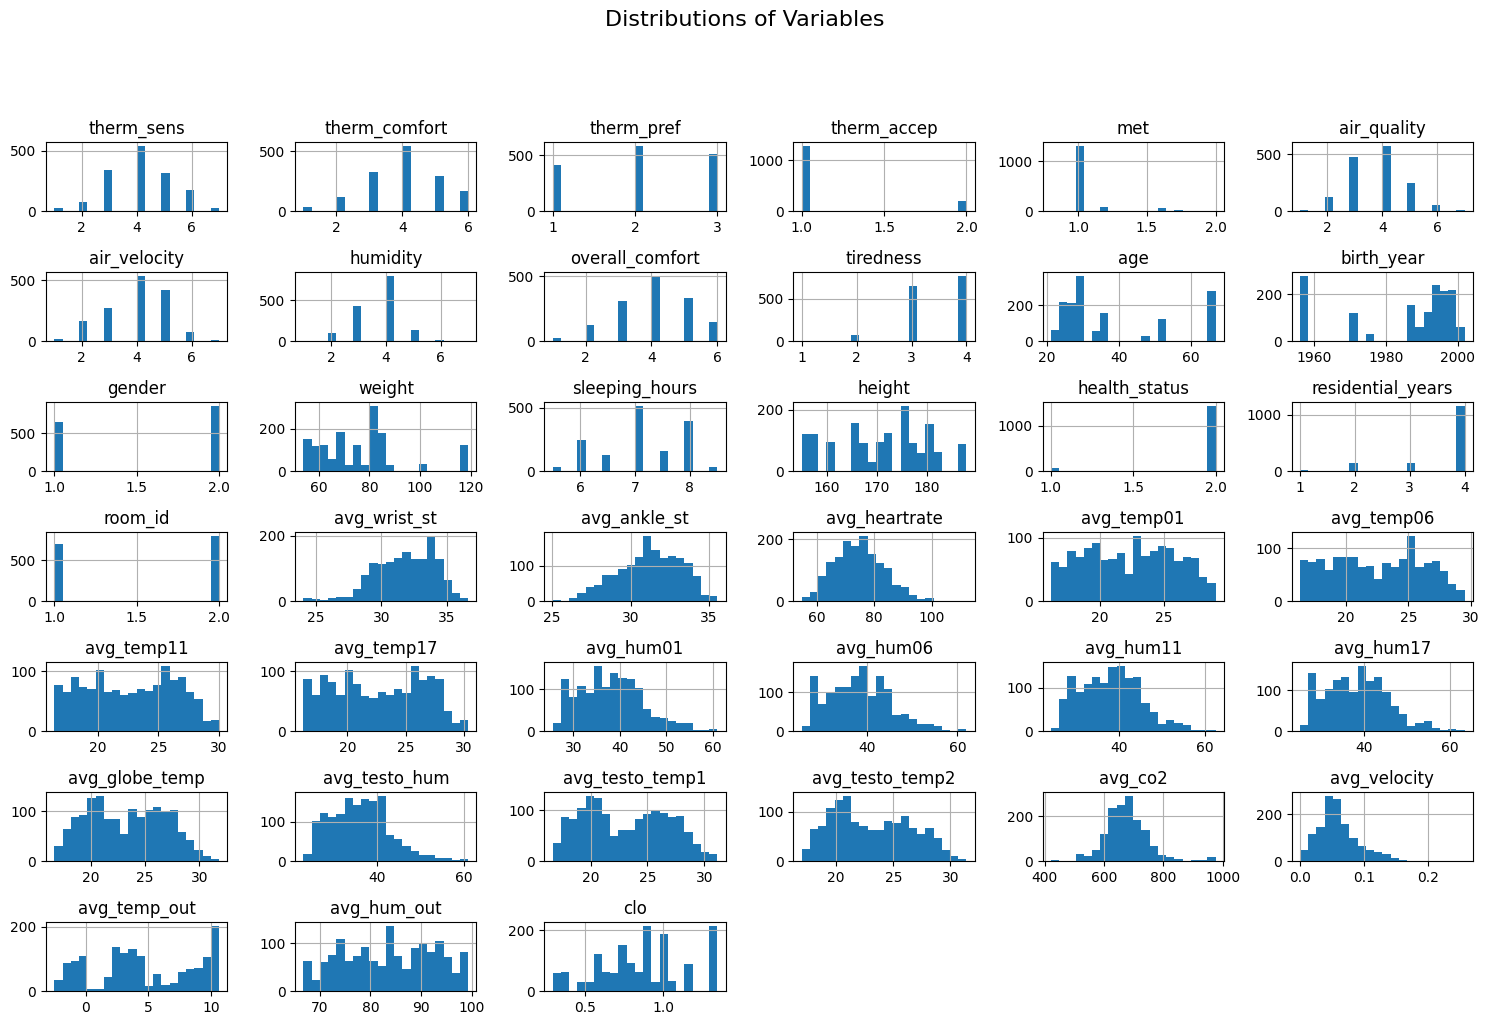

In [26]:
exp_data.hist(bins=20, figsize=(15, 10))

plt.suptitle("Distributions of Variables", size=16, y=1.02)  
plt.tight_layout(rect=[0, 0, 1, 0.96]) 
plt.show()
